In [43]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [60]:
# read image file
test_image = mpimg.imread('test_images/vehicles_smallset/cars1/1.jpeg')

In [117]:
# Compute the color histogram features

def color_hist(image, nbins=32, bins_range=(0,256)):
    rhist = np.histogram(image[:,:,0], nbins, bins_range)
    ghist = np.histogram(image[:,:,1], nbins, bins_range)
    bhist = np.histogram(image[:,:,2], nbins, bins_range)
    
    # Bin center
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:] + bin_edges[0: len(bin_edges)-1]) / 2
    
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    
    return rhist, ghist, bhist, bin_centers, hist_features


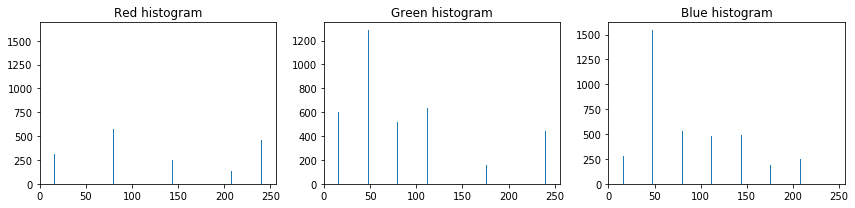

In [118]:
# Plot an histogram of the colors
rh, gh, bh, bincen, feature_vec = color_hist(test_image, nbins=8, bins_range=(0,256))
if rh is not None:
    fig = plt.figure(figsize=(12, 3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0,256)
    plt.title('Red histogram')
    
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0,256)
    plt.title('Green histogram')
    
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0,256)
    plt.title('Blue histogram')
    
    fig.tight_layout()

In [63]:
# Color spacing 

from mpl_toolkits.mplot3d import Axes3D

def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=[(0, 255), (0, 255), (0, 255)]):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation


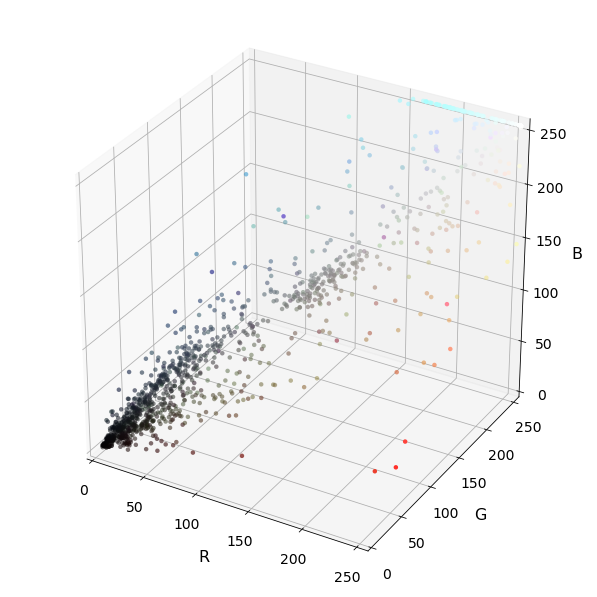

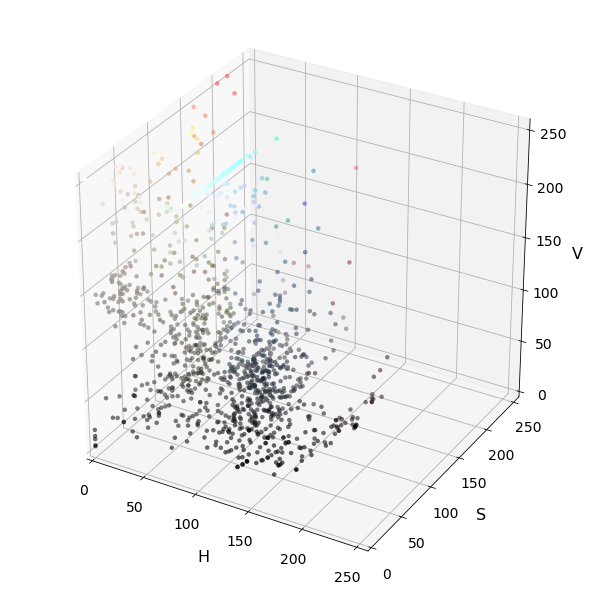

In [53]:
# Read a color image
img = cv2.imread("./test_images/000275.png")

# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

# Plot and show
plot3d(img_small_RGB, img_small_rgb)
plt.show()

plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.show()

In [65]:
# Perform spatial binning on an image

def spatial_binning(image, size=(32,32)):
    return cv2.resize(image, size)
print(spatial_binning(test_image).shape)

(32, 32, 3)


In [99]:
# Convert image to feature vector for our classifier
def get_color_space(img, color_space):
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)
    return feature_image

def bin_spatial(img, color_space='RGB', size=(32,32)):    
    # use cv.resize().ravel() to convert to feature vector
    features = cv2.resize(get_color_space(img, color_space), size).ravel()    
    return features

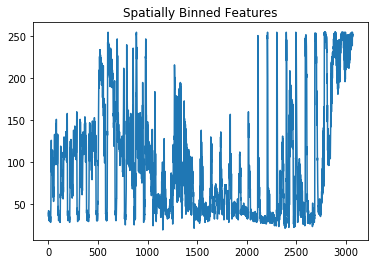

In [100]:
feature_vec = bin_spatial(test_image, color_space='RGB', size=(32,32))

plt.plot(feature_vec)
plt.title('Spatially Binned Features')

1196
Your function returned a count of 1196  cars and 1125  non-cars
of size:  (64, 64, 3)  and data type: uint8


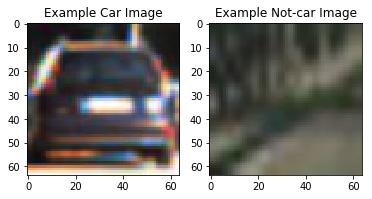

In [79]:
# Get some characteristics of the image dataset
import glob

cars = glob.glob('./test_images/vehicles_smallset/**/*.jpeg')
notcars = glob.glob('./test_images/non-vehicles_smallset/**/*.jpeg')

def data_look(cars_list, notcars_list):
    dataset = {}
    dataset["n_cars"] = len(cars_list)
    
    dataset["n_notcars"]= len(notcars_list)
    image = mpimg.imread(cars_list[0])
    
    dataset["image_shape"] = image.shape
    
    dataset["data_type"] = image.dtype
    
    return dataset
print(len(cars))

data_info = data_look(cars, notcars)

print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])
# Just for fun choose random car / not-car indices and plot example images 
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))
    
# Read in car / not-car images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])


# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(car_image)
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(notcar_image)
plt.title('Example Not-car Image')


In [81]:
# Histogram of Oriented Gradient

from skimage.feature import hog

def get_hog_features(image, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features = []
        hog_image = img
        features, hog_image = hog(image, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                 cells_per_block=(cell_per_block, cell_per_block), visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    else:
        features = hog(image, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                 cells_per_block=(cell_per_block, cell_per_block), visualise=vis, feature_vector=feature_vec)
        return features
    


/home/petsome/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


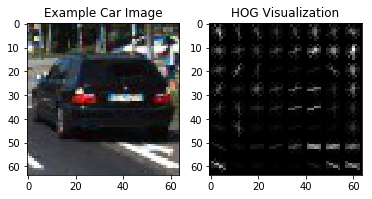

In [96]:
# Generate a random index to look at a car image
ind = np.random.randint(0, len(cars))
# Read in the image
image = mpimg.imread(cars[ind])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2
# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)


# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')


In [137]:
# Feature extraction and combine two features
def extract_features(imgs, color_space='RGB', spatial_size=(32,32), hist_bins=32, hist_range=(0, 256)):    
    # use cv.resize().ravel() to convert to feature vector
    features = []
    for file in imgs:
        image = mpimg.imread(file)
        feature_image = get_color_space(image, color_space)
        spatial_features = cv2.resize(feature_image, spatial_size).ravel()    
        hist_features = color_hist(feature_image, nbins=hist_bins, bins_range=hist_range)
        features.append(np.concatenate((spatial_features, hist_features)))
    return features

In [144]:
from sklearn.preprocessing import StandardScaler
car_features = extract_features(cars, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))
notcar_features = extract_features(notcars, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))
if len(car_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
else: 
    print('Your function only returns empty feature vectors...')

ValueError: setting an array element with a sequence.